# Linear Regression with Python

PROBLEM STATEMENT:
Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

In [1]:
#Necessary libraries are imported
import pandas as pd

In [2]:
#Load dataset
data=pd.read_csv("USA_Housing.csv - USA_Housing.csv");

In [3]:
#Checking the top most 5 values
print(data.head());

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [4]:
#Dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
#Checking the last  5 values
print(data.tail());

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population        Price  \
4995                          3.46      22837.36103  1060193.786   
4996                          4.02      25616.11549  1482617.729   
4997                          2.13      33266.14549  1030729.583   
4998                          5.44      42625.62016  1198656.872   
4999                          4.07      46501.28380  1298950.480   

                                                Address  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Bo

In [6]:
#Drop any unnecessary column(s)
data.drop('Address', axis=1,inplace=True)
print(data)


      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
5          80175.75416             4.988408                   6.104512   
6          64698.46343             6.025336                   8.147760   
7          78394.33928             6.989780                   6.620478   
8          59927.66081             5.362126                   6.393121   
9          81885.92718             4.423672                   8.167688   
10         80527.47208             8.093513                   5.042747   
11         50593.69550             4.496513                   7.467627   
12         39033.80924             7.6

In [7]:
#PAIRPLOT
import seaborn as sb
sb.pairplot(data)

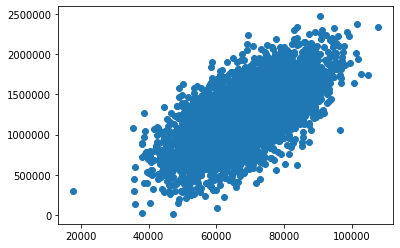

In [8]:
#Sscatter plot
import matplotlib.pyplot as plt
plt.scatter(data['Avg. Area Income'],data['Price'])


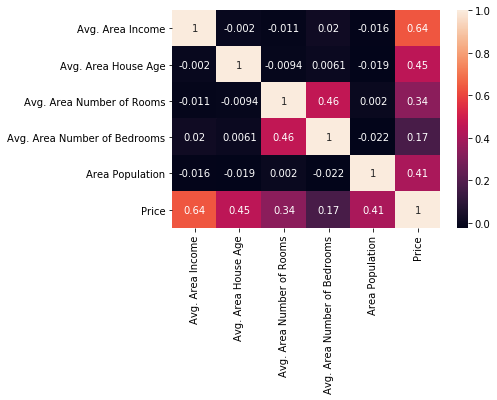

In [9]:
#HEAT MAP
#LIB:SEABORN
#CLASS:HEATMAP
import seaborn as sb
#sb.heatmap(data)
#to customize it we use correlation matrix
sb.heatmap(data.corr(),annot=True)
#annot-co-efficeint relation values

In [23]:
#From the HEATMAP,we can say that the 'Avg. Area Number of Bedrooms' and 'Avg. Area Number ofRoooms' has higher co-relation,and when we comapre the both with 
#price(our target)It is seen that the 'Avg. Area Number of Bedrooms',so this attribute can be droppped.
#we drop the bedroom column,as 
data.drop('Avg. Area Number of Bedrooms',axis=1,inplace=True)
print(data)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
5          80175.75416             4.988408                   6.104512   
6          64698.46343             6.025336                   8.147760   
7          78394.33928             6.989780                   6.620478   
8          59927.66081             5.362126                   6.393121   
9          81885.92718             4.423672                   8.167688   
10         80527.47208             8.093513                   5.042747   
11         50593.69550             4.496513                   7.467627   
12         39033.80924             7.6

In [24]:
#Splitting the concept and target
x=data.iloc[:,:-1].values
y=data.iloc[:,4].values


Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.



In [25]:
#Import necessary module
from sklearn.model_selection import train_test_split as tts


In [26]:
#Create train and test arrays
x_train,x_test,y_train,y_test=tts(x,y)
print(x_train)

[[7.70988689e+04 7.75739033e+00 6.24675884e+00 4.64785216e+04]
 [7.54870326e+04 6.45393168e+00 7.73709568e+00 4.11053906e+04]
 [7.23178087e+04 6.18052240e+00 6.27467288e+00 4.39114817e+04]
 ...
 [6.06988155e+04 7.95104585e+00 6.22580198e+00 4.84953197e+04]
 [8.12200706e+04 6.26801001e+00 6.77698348e+00 3.28595177e+04]
 [7.54749733e+04 8.44946816e+00 7.20651695e+00 2.40346283e+04]]


In [27]:
#ALGORITHM:LINEAR REGRESSION
from sklearn.linear_model import LinearRegression 
#creating object
mod_lr=LinearRegression()

In [28]:
#we train the algorithm
mod_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#we predict
predictions=mod_lr.predict(x_test)

In [30]:
#Testing the accuracy of the model
logaccuracy=mod_lr.score(x_test,y_test)
print("Accuracy",logaccuracy)

Accuracy 0.9150611702113411


In [31]:
#Linear Regression : y=mx+c where m-slope and c-intercept
#Print the intercept
#SYNTAX: MODELNAME.intercept_
print('Intercept:',mod_lr.intercept_) 

Intercept: -2648675.041734921


In [32]:
#Check the slope aka co-efficient
#Library: pandas
#Class  : DataFrame
#Argument:MODELNAME.coef_
#Other arguments might also be necessary
print('Slope:' ,mod_lr.coef_) 

Slope: [2.16748899e+01 1.65349948e+05 1.22193085e+05 1.52337828e+01]


# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|
 
Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.


In [33]:
from sklearn import metrics
import numpy as np

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 79809.4473131967
MSE: 10012031714.13964
RMSE: 100060.14048630773
